In [1]:
import numpy as np
from numpy import sin, cos, pi

import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
def f(t, y, m):
    """
    
    # Argument
    `y`: ndarray of shape (6,)
    """
    assert m > 0
    _Fr, _Fth, _Fph = -1.0/y[0]**2, 0.0, 0.0
    
    _f = np.empty_like(y)
    _f[0:3] = y[3:]
    _f[3] = _Fr/m + y[0]*y[5]**2
    _f[4] = (_Fth/m) / y[0]
    _f[5] = (_Fph/m - 2.0*y[3]*y[5]) / y[0]
    
    return _f

In [3]:
m = 1.0
t0, sol_t0 = 0.0, (1, pi/2.0, 0.0, 0.0, 0.0, 1.2)
t_arr = np.linspace(t0, 5.0, 20)

r = ode(f).set_f_params(m).set_integrator('lsoda')
r.set_initial_value(sol_t0, t0)

sol_t = np.empty((t_arr.size, 6), dtype=float)
sol_t[0,:] = sol_t0
for i in range(1,t_arr.size):
    sol_t[i,:] = r.integrate(t_arr[i])
    if not r.successful():
        raise Exception("integration failed")

In [4]:
r_t, theta_t, phi_t = sol_t[:,:3].transpose()
x_t, y_t, z_t = r_t*sin(theta_t)*cos(phi_t), r_t*sin(theta_t)*sin(phi_t), r_t*cos(theta_t)

# Confirm that the solution lies on the xy-plane since theta was fixed to pi/2
assert np.all(np.abs(theta_t - pi / 2) < 1e-14)
assert np.all(np.abs(z_t) < 1e-14)

In [5]:
sol_annot_str = r"[$r,\theta,\phi,\dot{{r}},\dot{{\theta}},\dot{{\phi}}$]"
sol_t0_str = np.array2string(sol_t[0,:], precision=3, separator=',', formatter={'float':"{:.2f}".format})

Text(0.5, 1.0, '[$r,\\theta,\\phi,\\dot{{r}},\\dot{{\\theta}},\\dot{{\\phi}}$] = [1.00,1.57,0.00,0.00,0.00,1.20]')

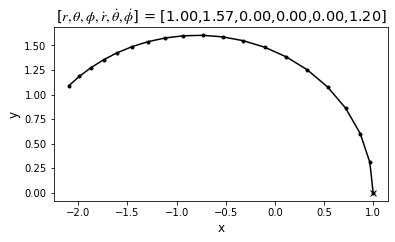

In [6]:
fig, ax = plt.subplots()

lsol, = ax.plot(x_t, y_t, '.-', color='black')
ax.plot(x_t[0], y_t[0], 'x', color=lsol.get_color())

ax.set_aspect(1.0)
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title(r"{} = {}".format(sol_annot_str, sol_t0_str))

In [7]:
fig_filename = "Fr=-r^-2_init-{}_tmax-{}.png".format(sol_t0_str, t_arr[-1])
print(fig_filename)
# fig.savefig(fig_filename)

Fr=-r^-2_init-[1.00,1.57,0.00,0.00,0.00,1.20]_tmax-5.0.png
